In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import requests
import matplotlib.pyplot as plt

import sys
from pathlib import Path
sys.path.insert(0,str(Path(os.path.abspath('.')).parent.parent))
import library.validation.accuracy.metric as metric

In [2]:
ticket_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis"
data_path = os.path.join(ticket_path, "IN3136_EURAC_shared_folder/data_sites")
results_path = os.path.join(ticket_path, "IN3136_EURAC_shared_folder/validation")
plots_path = os.path.join(ticket_path, "IN3136_EURAC_shared_folder/plots")


## read sites metadata

In [3]:
sites_metadata = pd.read_csv(os.path.join(data_path, "sites_metadata.csv"), index_col=0)
sites_metadata

,country,latitude,longitude,altitude,provider
station_name,,,,,
camborne,United Kingdom,50.22,-5.32,88.0,bsrn
carpentras,France,44.08,5.06,100.0,bsrn
budapest_lorinc,Hungary,47.43,19.18,139.0,bsrn
magurele_mars,Romania,44.34,26.01,110.0,bsrn
cabauw,Netherlands,51.97,4.93,0.0,bsrn
...,...,...,...,...,...
dublin_arpt,Ireland,53.43,-6.23,82.0,wrdc
grossenzersdorf,Austria,48.20,16.57,157.0,wrdc
gonzaga,Italy,44.96,10.77,16.0,lombardy


## based on daily data

### read data

In [4]:
reference_data_daily = pd.read_csv(os.path.join(data_path, "parsed", "parsed_reference_data_daily.csv"), index_col=0)
model_data_daily = pd.read_csv(os.path.join(data_path, "parsed", "parsed_model_data_daily.csv"), index_col=0)

In [5]:
# convert index in pd.DateTimeIndex
reference_data_daily.index = pd.DatetimeIndex(reference_data_daily.index)
model_data_daily.index = pd.DatetimeIndex(model_data_daily.index)

### parse

In [6]:
# convert to nan where the other dataset is nan
reference_data_daily = reference_data_daily.where(model_data_daily.notna())
model_data_daily = model_data_daily.where(reference_data_daily.notna())

In [7]:
reference_data_daily

,camborne,carpentras,budapest_lorinc,magurele_mars,cabauw,cener,payerne,heino,lauwersoog,lelystad_locatie_23t,...,bergerac,blois,zuerich_kloten,basel,gurteen,dublin_arpt,grossenzersdorf,gonzaga,landriano,cornale
2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2327.778,1611.111,844.444,1483.333,158.333,330.556,377.778,NaN,NaN,NaN
2015-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# aggregate
reference_data_monthly = reference_data_daily.resample('MS').sum(min_count=1)
model_data_monthly = model_data_daily.resample('MS').sum(min_count=1)
reference_data_yearly = reference_data_daily.resample('AS').sum(min_count=1)
model_data_yearly = model_data_daily.resample('AS').sum(min_count=1)

## based on hourly data

### read data

In [9]:
reference_data_hourly = pd.read_csv(os.path.join(data_path, "parsed", "parsed_reference_data_hourly.csv"), index_col=0)
model_data_hourly = pd.read_csv(os.path.join(data_path, "parsed", "parsed_model_data_hourly.csv"), index_col=0)

In [10]:
# convert index in pd.DateTimeIndex
reference_data_hourly.index = pd.DatetimeIndex(reference_data_hourly.index)
model_data_hourly.index = pd.DatetimeIndex(model_data_hourly.index)

### parse

In [11]:
# convert to nan where the other dataset is nan
reference_data_hourly = reference_data_hourly.where(model_data_hourly.notna())
model_data_hourly = model_data_hourly.where(reference_data_hourly.notna())

## validation

In [12]:
validation_metrics = pd.read_csv(os.path.join(results_path, "validation_metrics.csv"), index_col = 0)

In [13]:
validation_metrics

,nmbe,nrmse_yearly,nrmse_monthly,nrmse_daily,nrmse_hourly,valid_data_pairs_daily,valid_data_pairs_hourly
camborne,-1.713271,2.390578,2.960226,20.515307,19.891331,12474,11704.0
carpentras,-0.667623,0.908728,2.305455,11.637070,11.227009,19023,17686.0
budapest_lorinc,-0.438789,0.516789,2.504264,15.510051,15.026375,12229,11460.0
magurele_mars,-0.241528,0.241528,2.793683,13.151986,12.704396,3306,3081.0
cabauw,-0.199198,0.609549,2.155886,16.649853,16.077524,33360,31050.0
...,...,...,...,...,...,...,...
dublin_arpt,3.362028,3.494330,5.239870,9.972663,NaN,2187,NaN
grossenzersdorf,5.926388,6.072439,6.855718,9.840883,NaN,2192,NaN
gonzaga,-6.679113,6.724571,7.997686,38.823848,16.058042,33448,28018.0
landriano,-0.069454,1.363417,3.209997,38.937531,12.993406,33280,27945.0


# Climate zones

In [14]:
api_url = "http://climateapi.scottpinkelman.com/api/v1/location/{lat}/{lon}"

for index, row in sites_metadata.iterrows():
    response = requests.get(api_url.format(lat=row['latitude'], lon=row['longitude']))
    
    if response.status_code == 200:
        result = response.json()
        
        if 'return_values' in result:
            climate_zone = result["return_values"][0].get("koppen_geiger_zone", "Climate zone not available")
            zone_description = result["return_values"][0].get("zone_description", "Description not available")
            
            sites_metadata.at[index, "climate_zone"] = climate_zone
            sites_metadata.at[index, "zone_description"] = zone_description
        else:
            sites_metadata.at[index, "climate_zone"] = 'Unavailable'
            sites_metadata.at[index, "zone_description"] = 'Unavailable'
            print(f"No climate data available for {row['latitude']}, {row['longitude']}")
    else:
        sites_metadata.at[index, "climate_zone"] = 'Unavailable'
        sites_metadata.at[index, "zone_description"] = 'Unavailable'
        print(f"Failed to retrieve climate data for {row['latitude']}, {row['longitude']}")


No climate data available for 52.9, 5.38


In [15]:
sites_metadata

,country,latitude,longitude,altitude,provider,climate_zone,zone_description
station_name,,,,,,,
camborne,United Kingdom,50.22,-5.32,88.0,bsrn,Cfb,"Marine west coast, warm summer"
carpentras,France,44.08,5.06,100.0,bsrn,Cfb,"Marine west coast, warm summer"
budapest_lorinc,Hungary,47.43,19.18,139.0,bsrn,Cfb,"Marine west coast, warm summer"
magurele_mars,Romania,44.34,26.01,110.0,bsrn,Cfa,"Humid subtropical, no dry season"
cabauw,Netherlands,51.97,4.93,0.0,bsrn,Cfb,"Marine west coast, warm summer"
...,...,...,...,...,...,...,...
dublin_arpt,Ireland,53.43,-6.23,82.0,wrdc,Cfb,"Marine west coast, warm summer"
grossenzersdorf,Austria,48.20,16.57,157.0,wrdc,Cfb,"Marine west coast, warm summer"
gonzaga,Italy,44.96,10.77,16.0,lombardy,Cfa,"Humid subtropical, no dry season"


In [16]:
sites_metadata['climate_zone'].unique()

array(['Cfb', 'Cfa', 'Unavailable', 'Cfc', 'BSk', 'Csb', 'Csa', 'Dfb'],
      dtype=object)

# Bar chart

## group

In [17]:
sites_c = sites_metadata[sites_metadata['climate_zone'].str.startswith('C')]
sites_d = sites_metadata[sites_metadata['climate_zone'].str.startswith('D')]

In [18]:
nmbe_c = validation_metrics.loc[sites_c.index, 'nmbe']
nmbe_d = validation_metrics.loc[sites_d.index, 'nmbe']

nrmse_hou_c = validation_metrics.loc[sites_c.index, 'nrmse_hourly']
nrmse_hou_d = validation_metrics.loc[sites_d.index, 'nrmse_hourly']

nrmse_dai_c = validation_metrics.loc[sites_c.index, 'nrmse_daily']
nrmse_dai_d = validation_metrics.loc[sites_d.index, 'nrmse_daily']

nrmse_mon_c = validation_metrics.loc[sites_c.index, 'nrmse_monthly']
nrmse_mon_d = validation_metrics.loc[sites_d.index, 'nrmse_monthly']

nrmse_yea_c = validation_metrics.loc[sites_c.index, 'nrmse_yearly']
nrmse_yea_d = validation_metrics.loc[sites_d.index, 'nrmse_yearly']


In [15]:
stats_nrmse_c = nrmse_dai_c.describe()
stats_nrmse_d = nrmse_dai_d.describe()

combined_stats_t = pd.concat([stats_nrmse_c, stats_nrmse_d], keys=['nrmse_c', 'nrmse_d'], axis=1).transpose()

In [16]:
combined_stats_t

,count,mean,std,min,25%,50%,75%,max
nrmse_c,74.0,20.034183,22.748683,5.257688,7.458348,10.649749,21.351972,170.852566
nrmse_d,3.0,9.303267,1.110016,8.478035,8.672289,8.866543,9.715883,10.565224


In [97]:
print(combined_stats[['count', 'max', 'min', 'mean', 'std']])

         count         max       min       mean        std
nrmse_c   74.0  170.852566  5.257688  20.034183  22.748683
nrmse_d    3.0   10.565224  8.478035   9.303267   1.110016


In [35]:
sites_d

,country,latitude,longitude,altitude,provider,climate_zone,zone_description
station_name,,,,,,,
norrkoping,Sweden,58.58,16.15,43.0,wrdc,Dfb,"Humid continental, no dry season, warm summer"
karlstad,Sweden,59.37,13.47,46.0,wrdc,Dfb,"Humid continental, no dry season, warm summer"
stockholm,Sweden,59.35,18.07,30.0,wrdc,Dfb,"Humid continental, no dry season, warm summer"


In [34]:
nrmse_hou_d

station_name
norrkoping   NaN
karlstad     NaN
stockholm    NaN
Name: nrmse_hourly, dtype: float64

In [17]:
average_nmbe_c = nmbe_c.mean()
average_nmbe_d = nmbe_d.mean()

average_nrmse_hou_c = nrmse_hou_c.mean()
average_nrmse_hou_d = nrmse_hou_d.mean()

average_nrmse_dai_c = nrmse_dai_c.mean()
average_nrmse_dai_d = nrmse_dai_d.mean()

average_nrmse_mon_c = nrmse_mon_c.mean()
average_nrmse_mon_d = nrmse_mon_d.mean()

average_nrmse_yea_c = nrmse_yea_c.mean()
average_nrmse_yea_d = nrmse_yea_d.mean()

## plot

In [98]:
groups = ['Temperate', 'Continental']

average_nmbe = [average_nmbe_c, average_nmbe_d]
average_nrmse_hou = [average_nrmse_hou_c, average_nrmse_hou_d]
average_nrmse_dai = [average_nrmse_dai_c, average_nrmse_dai_d]
average_nrmse_mon = [average_nrmse_mon_c, average_nrmse_mon_d]
average_nrmse_yea = [average_nrmse_yea_c, average_nrmse_yea_d]


In [99]:
for metric_list in [average_nmbe, average_nrmse_hou, average_nrmse_dai, average_nrmse_mon, average_nrmse_yea]:
    for i in range(len(metric_list)):
        if np.isnan(metric_list[i]).all():
            metric_list[i] = 0

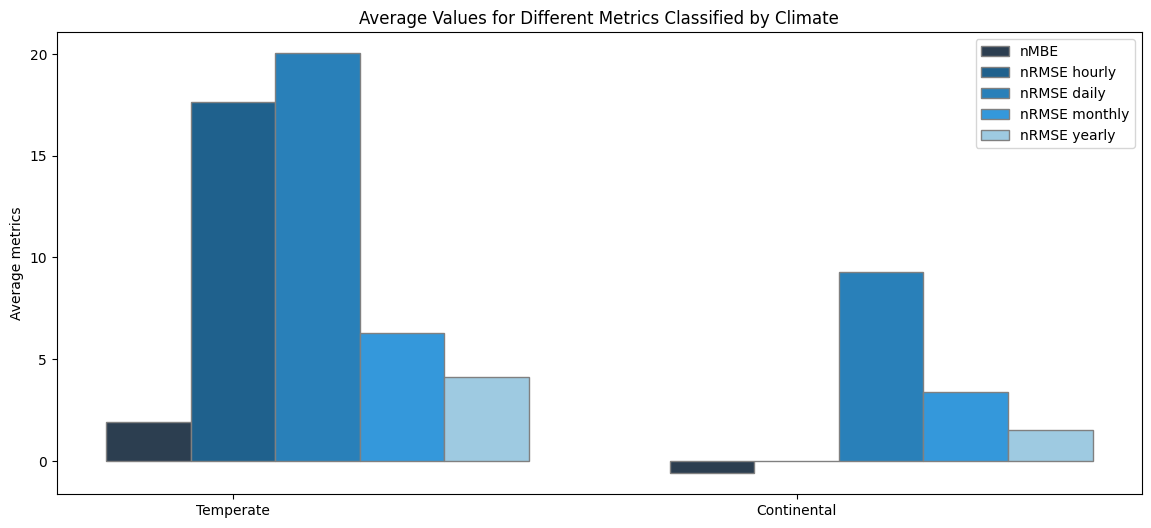

In [100]:
bar_width = 0.15
r1 = np.arange(len(groups))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]
r4 = [x + 3 * bar_width for x in r1]
r5 = [x + 4 * bar_width for x in r1]

plt.figure(figsize=(14,6))

plt.bar(r1, average_nmbe, color='#2c3e50', width=bar_width, edgecolor='grey', label='nMBE')
plt.bar(r2, average_nrmse_hou, color='#1f618d', width=bar_width, edgecolor='grey', label='nRMSE hourly')
plt.bar(r3, average_nrmse_dai, color='#2980b9', width=bar_width, edgecolor='grey', label='nRMSE daily')
plt.bar(r4, average_nrmse_mon, color='#3498db', width=bar_width, edgecolor='grey', label='nRMSE monthly')
plt.bar(r5, average_nrmse_yea, color='#9ecae1', width=bar_width, edgecolor='grey', label='nRMSE yearly')

plt.ylabel('Average metrics')
plt.title('Average Values for Different Metrics Classified by Climate')
plt.xticks([x + bar_width for x in r1], groups)
plt.legend()

plt.savefig(os.path.join(plots_path, 'climate_zones/average_metrics.png'), dpi=300)

plt.show()


# Box plot

In [199]:
data_temperate_hourly = [nrmse_hou_c, nrmse_hou_d]
data_temperate_daily = [nrmse_dai_c, nrmse_dai_d]
data_temperate_monthly = [nrmse_mon_c, nrmse_mon_d]
data_temperate_yearly = [nrmse_yea_c, nrmse_yea_d]

metrics = ['Hourly', 'Daily', 'Monthly', 'Yearly']
ticks = ['Temperate', 'Continental']

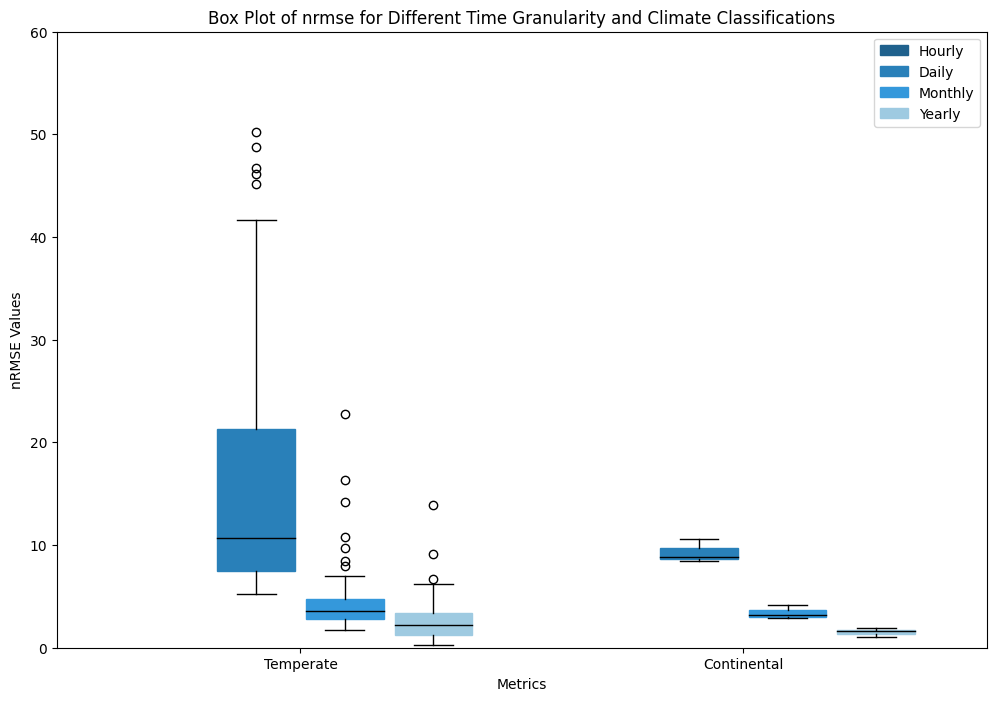

In [201]:
fig, ax = plt.subplots(figsize=(12,8))

bph = plt.boxplot(data_temperate_hourly, positions=np.array(range(len(data_temperate_hourly)))*2.0-0.6, widths=0.35, patch_artist=True)
bpd = plt.boxplot(data_temperate_daily, positions=np.array(range(len(data_temperate_daily)))*2.0-0.2, widths=0.35, patch_artist=True)
bpm = plt.boxplot(data_temperate_monthly, positions=np.array(range(len(data_temperate_monthly)))*2.0+0.2, widths=0.35, patch_artist=True)
bpy = plt.boxplot(data_temperate_yearly, positions=np.array(range(len(data_temperate_yearly)))*2.0+0.6, widths=0.35, patch_artist=True)

set_box_color(bph, '#1f618d') 
set_box_color(bpd, '#2980b9') 
set_box_color(bpm, '#3498db') 
set_box_color(bpy, '#9ecae1') 

ax.set_xticks(range(0, len(ticks) * 2, 2))
ax.set_xticklabels(ticks)
ax.set_xlabel('Metrics')
ax.set_ylabel('nRMSE Values')
ax.set_title('Box Plot of nrmse for Different Time Granularity and Climate Classifications')

plt.ylim(0,60)
plt.legend([bph["boxes"][0], bpd["boxes"][0],bpm["boxes"][0], bpy["boxes"][0]], metrics)

plt.savefig(os.path.join(plots_path, 'climate_zones/boxplot_nRMSE.png'), dpi=300)

plt.show()

# nMBE by month (mean for each site and each hour)

## nMBE

In [41]:
nmbe_mean_by_month = {}

for column in reference_data_monthly.columns:
    nmbe_mean_by_month[column] = {}
    for month in range(1,13):
        actual_monthly = reference_data_monthly[reference_data_monthly.index.month == month][column]
        predicted_monthly = model_data_monthly[model_data_monthly.index.month == month][column]

        if not actual_monthly.empty and not predicted_monthly.empty:
            nmbe_value = metric.nmbe(predicted_monthly, actual_monthly)
            nmbe_mean_by_month[column][month] = nmbe_value

In [42]:
nmbe_mean_by_month

{'camborne': {1: -0.07240442809711904,
  2: -0.05519056067901859,
  3: -0.013381072775907834,
  4: -0.02181305256854389,
  5: -0.008363670178588543,
  6: -0.0076033183506235245,
  7: 0.004858534887443101,
  8: -0.009889241789571377,
  9: -0.027606707500432138,
  10: -0.0673969994468517,
  11: -0.034700879998829794,
  12: -0.051301424599426465},
 'carpentras': {1: -0.009160704575857525,
  2: -0.003037548374842527,
  3: 0.012798027506690153,
  4: 0.00033653079899522516,
  5: -0.020143702640376876,
  6: 0.004347569080037502,
  7: 0.009725723459320532,
  8: 0.00026636519225249633,
  9: -0.02736852507799966,
  10: -0.048074758311081246,
  11: -0.03627349542453099,
  12: -0.002481709665924063},
 'budapest_lorinc': {1: 0.08612237971474998,
  2: 0.045344599360136295,
  3: 0.0012071455731281458,
  4: -0.024851043144111996,
  5: -0.016602044101062603,
  6: -0.001432801384843794,
  7: 0.011632269023776832,
  8: -0.002223216156688429,
  9: -0.029515776513776182,
  10: -0.037730753096128805,
  11: 

In [44]:
pd.DataFrame(nmbe_mean_by_month)

,camborne,carpentras,budapest_lorinc,magurele_mars,cabauw,cener,payerne,heino,lauwersoog,lelystad_locatie_23t,...,bergerac,blois,zuerich_kloten,basel,gurteen,dublin_arpt,grossenzersdorf,gonzaga,landriano,cornale
1,-0.072404,-0.009161,0.086122,NaN,-0.004888,-0.011613,-0.018471,-0.006452,-0.035194,0.006084,...,0.021133,0.079367,-0.077338,-0.030118,-0.027410,-0.033289,0.201822,-0.047363,-0.011431,0.156347
2,-0.055191,-0.003038,0.045345,NaN,-0.040409,0.000762,0.006676,-0.022717,-0.035983,-0.034882,...,0.016670,-0.008126,0.015888,0.024838,-0.012795,0.003012,0.138738,-0.074822,-0.013439,0.160864
3,-0.013381,0.012798,0.001207,NaN,-0.010488,0.012647,0.010242,0.005692,0.004004,0.012961,...,0.003480,0.025482,0.024759,0.031672,0.002848,0.030608,0.095342,-0.080098,-0.020665,0.115751
4,-0.021813,0.000337,-0.024851,NaN,-0.002613,0.003533,0.013306,0.013116,-0.004893,0.008135,...,0.013635,0.021275,0.007604,0.028422,0.029315,0.051433,0.059203,-0.072591,-0.009884,0.088769
5,-0.008364,-0.020144,-0.016602,-0.025053,-0.010773,-0.004416,0.002477,0.019965,0.001712,0.008960,...,0.008211,0.014138,0.016321,0.036665,0.022367,0.029547,0.057223,-0.063766,-0.005650,0.052569
6,-0.007603,0.004348,-0.001433,0.015041,0.009828,0.017113,0.019178,0.039870,0.006619,0.018550,...,0.024347,0.029344,0.019173,0.025312,0.044835,0.045409,0.041452,-0.060232,0.007073,0.075582
7,0.004859,0.009726,0.011632,0.015861,0.007947,0.022570,0.023390,0.038204,0.005960,0.026781,...,0.043102,0.035102,0.016051,0.027467,0.042887,0.050895,0.045781,-0.051944,0.025173,0.108715
8,-0.009889,0.000266,-0.002223,-0.013757,0.007997,0.012140,0.023489,0.033751,0.007729,0.024452,...,0.028911,0.018146,0.004387,0.019986,0.026892,0.044686,0.049917,-0.066174,0.011541,0.120306
9,-0.027607,-0.027369,-0.029516,-0.036469,-0.003622,0.002989,0.010866,0.028425,0.007444,0.019594,...,0.023223,0.010171,-0.005842,0.016365,0.022636,0.022729,0.031415,-0.096914,-0.017288,0.160603
10,-0.067397,-0.048075,-0.037731,-0.008014,-0.012994,-0.017445,-0.005057,0.029838,-0.002513,0.016549,...,0.011967,-0.006012,-0.007523,0.012542,-0.000552,0.000862,0.053124,-0.084529,-0.019894,0.209528


## group

In [47]:
keys_month_c = sites_c.index.intersection(nmbe_mean_by_month.keys())
keys_month_d = sites_d.index.intersection(nmbe_mean_by_month.keys())


In [50]:
keys_month_d

Index(['norrkoping', 'karlstad', 'stockholm'], dtype='object', name='station_name')

## average

In [ ]:
average_nrmse_c_mean_by_month = {index: sum(nrmse_mean_by_month[key][index] for key in keys_month_c) / len(keys_month_c) for index in nrmse_mean_by_month[next(iter(keys_month_c))].keys()}
average_nrmse_d_mean_by_month = {index: sum(nrmse_mean_by_month[key][index] for key in keys_month_d) / len(keys_month_d) for index in nrmse_mean_by_month[next(iter(keys_month_d))].keys()}


In [123]:
average_nmbe_c_mean_by_month

{1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: 0.017819262148855465,
 6: 0.0271245097027317,
 7: 0.029659231463583825,
 8: 0.025337113897249252,
 9: 0.012219665390885277,
 10: 0.0009363114385467253,
 11: 0.008870875677687955,
 12: nan}

In [124]:
average_nmbe_d_mean_by_month

{1: -0.07193599400841229,
 2: -0.012092244345429442,
 3: 0.023852516432585708,
 4: -0.016075185781188793,
 5: -0.001207602037461436,
 6: -0.0014810518984126667,
 7: -0.0027451630104290245,
 8: -0.016367028135241362,
 9: -0.00867311783623633,
 10: -0.02389886622997305,
 11: -0.04116023382490571,
 12: nan}

## line graph

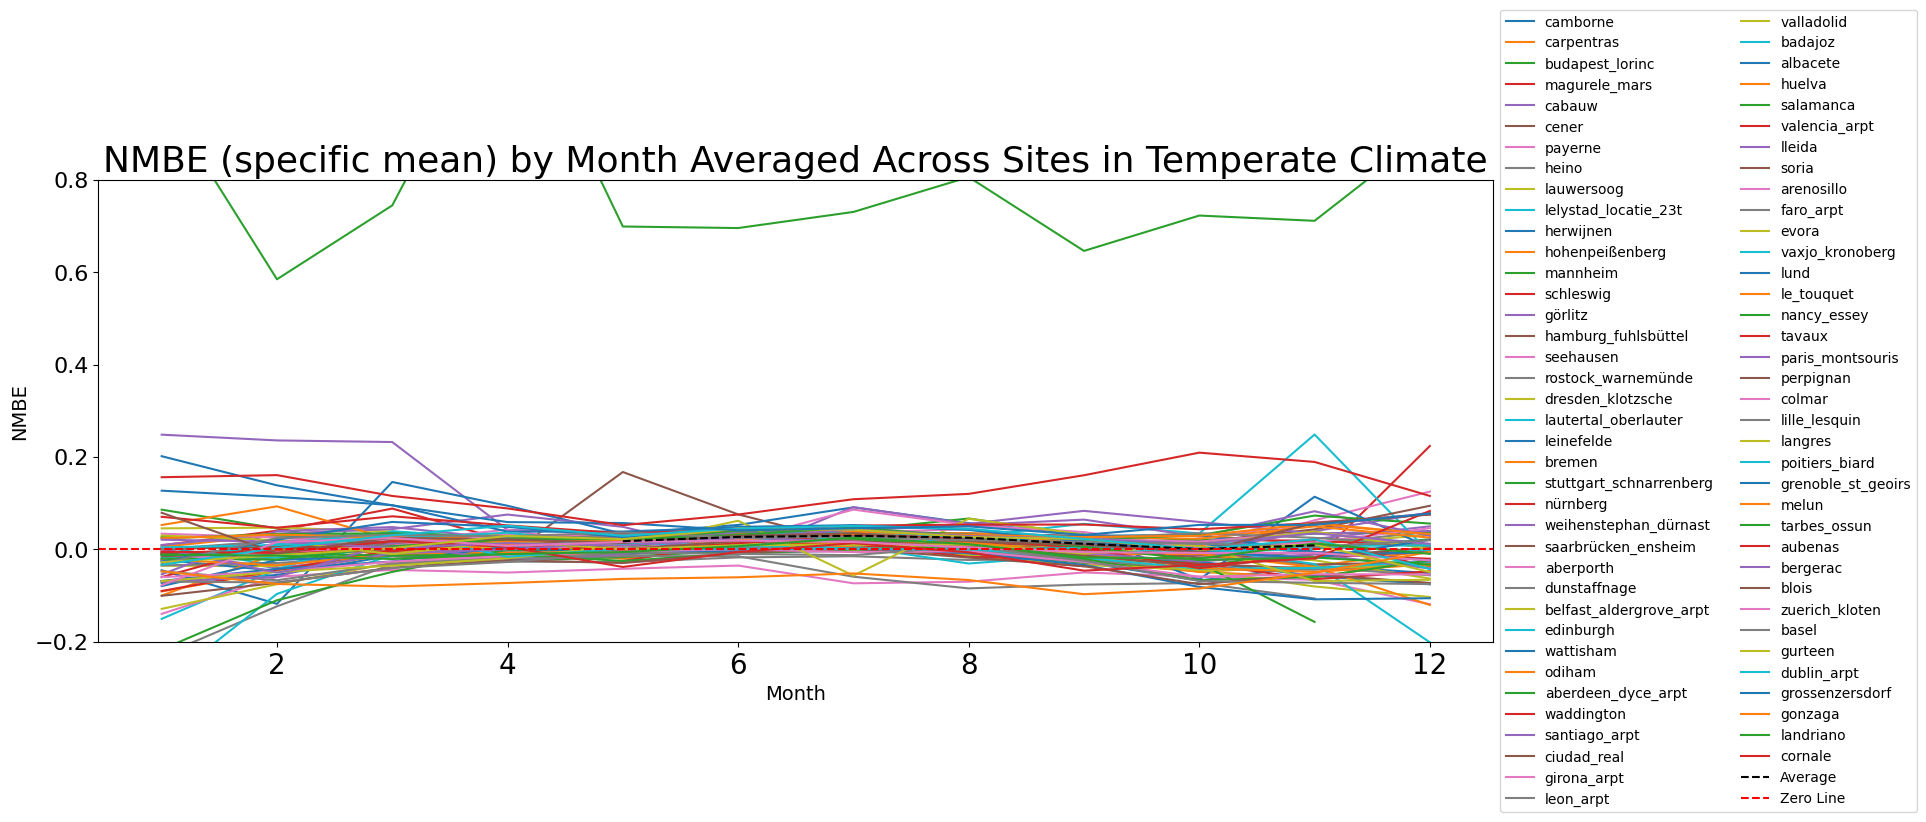

In [167]:
plt.figure(figsize=(18,6))

for key in keys_month_c:
    values = nmbe_mean_by_month[key]
    
    plt.plot(list(values.keys()), list(values.values()), label=key)


plt.plot(list(average_nmbe_c_mean_by_month.keys()), list(average_nmbe_c_mean_by_month.values()), label='Average', linestyle='--', color='black')

plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('NMBE', fontsize = 14)
plt.title('NMBE (specific mean) by Month Averaged Across Sites in Temperate Climate', fontsize = 26)

plt.tick_params(axis='x', labelsize = 20)
plt.tick_params(axis='y', labelsize = 16)

plt.ylim(-0.2,0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

# plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nMBE_c_spe.png'), dpi=300)

plt.show()

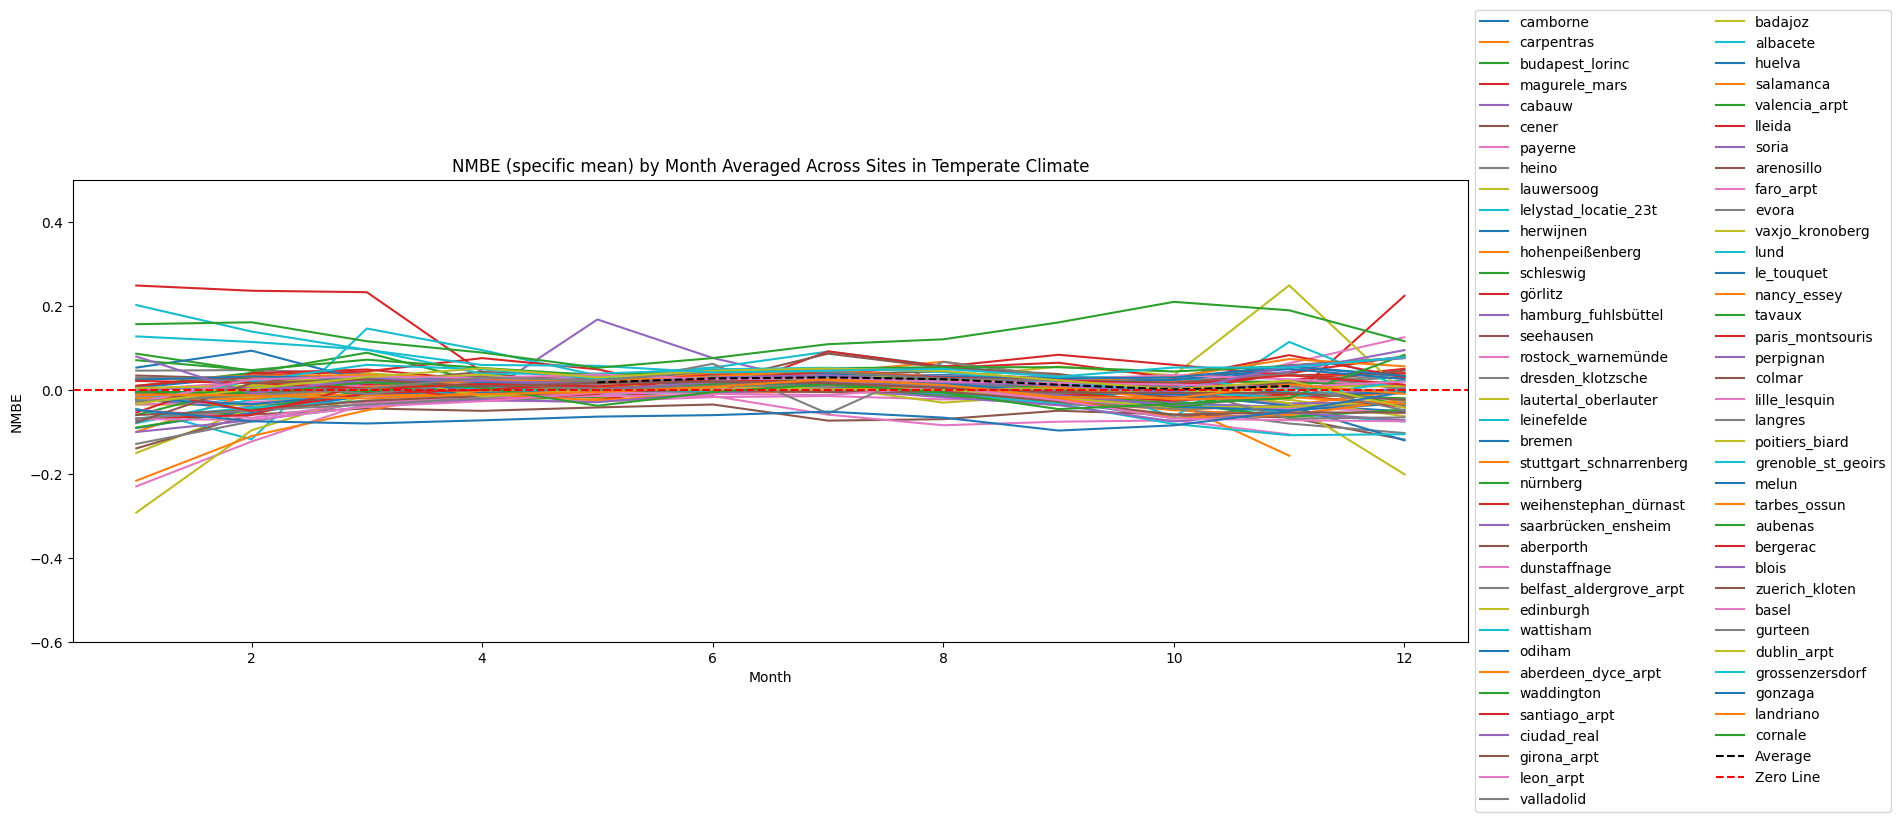

In [131]:
plt.figure(figsize=(18,6))

for key in keys_month_c:
    if key != 'mannheim':
        values = nmbe_mean_by_month[key]
    
        plt.plot(list(values.keys()), list(values.values()), label=key)


plt.plot(list(average_nmbe_c_mean_by_month.keys()), list(average_nmbe_c_mean_by_month.values()), label='Average', linestyle='--', color='black')

plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

plt.xlabel('Month')
plt.ylabel('NMBE')
plt.title('NMBE (specific mean) by Month Averaged Across Sites in Temperate Climate')

plt.ylim(-0.6,0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nMBE_c_spe.png'), dpi=300)

plt.show()

In [118]:
sites_metadata.loc['mannheim']

country                                    Germany
latitude                                     49.51
longitude                                     8.56
altitude                                      98.0
provider                                       dwd
climate_zone                                   Cfb
zone_description    Marine west coast, warm summer
Name: mannheim, dtype: object

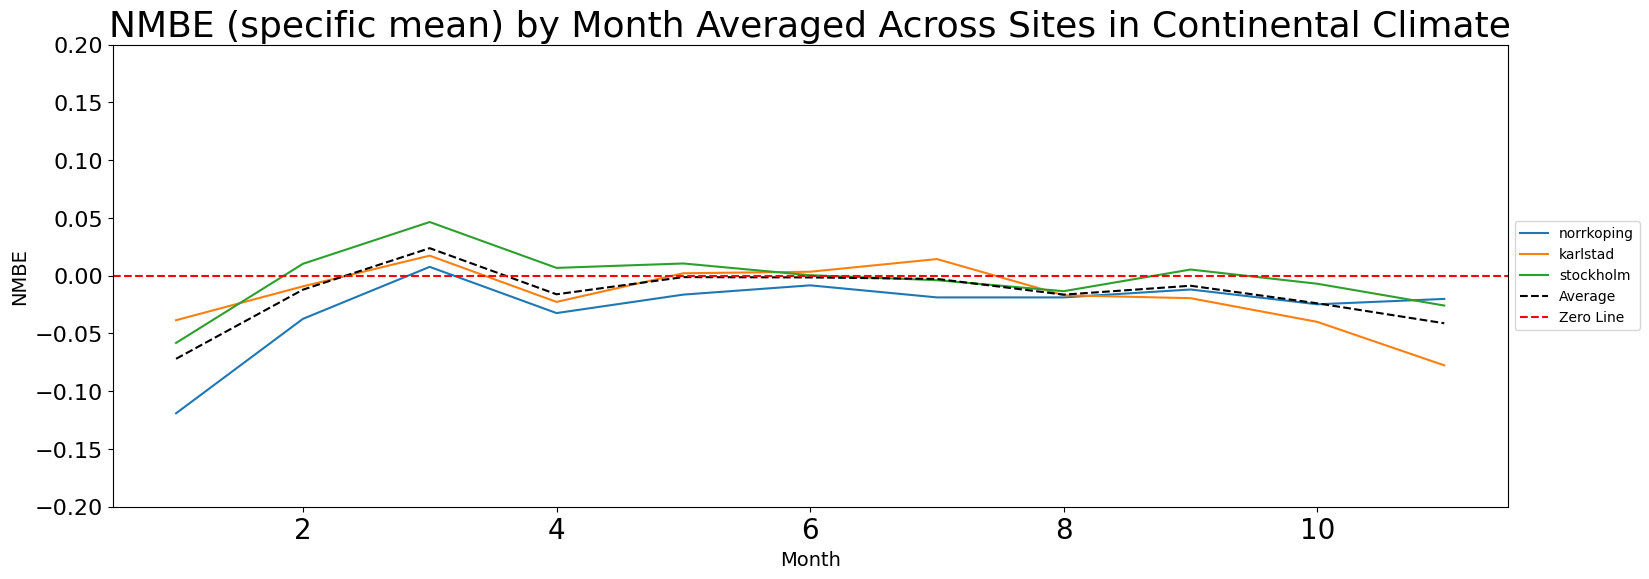

In [160]:
plt.figure(figsize=(18,6))

for key in keys_month_d:
    values = nmbe_mean_by_month[key]
    
    plt.plot(list(values.keys()), list(values.values()), label=key)

plt.plot(list(average_nmbe_d_mean_by_month.keys()), list(average_nmbe_d_mean_by_month.values()), label='Average', linestyle='--', color='black')

plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('NMBE', fontsize = 14)
plt.title('NMBE (specific mean) by Month Averaged Across Sites in Continental Climate', fontsize = 26)

plt.tick_params(axis='x', labelsize = 20)
plt.tick_params(axis='y', labelsize = 16)
plt.ylim(-0.2,0.2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nMBE_d_spe.png'), dpi=300)

plt.show()

## box plot

In [193]:
data_temperate_nmbe = [pd.DataFrame(nmbe_mean_by_month[key] for key in keys_month_c).loc[:, i] for i in range(1, 13)]
data_continental_nmbe = [pd.DataFrame(nmbe_mean_by_month[key] for key in keys_month_d).loc[:, i] for i in range(1, 13)]


In [99]:
data_temperate

[count    73.000000
 mean     -0.007791
 std       0.143092
 min      -0.292242
 25%      -0.059836
 50%      -0.018471
 75%       0.006084
 max       0.981709
 Name: 1, dtype: float64,
 count    73.000000
 mean      0.003015
 std       0.090910
 min      -0.123106
 25%      -0.043555
 50%      -0.006291
 75%       0.020883
 max       0.584786
 Name: 2, dtype: float64,
 count    73.000000
 mean      0.024449
 std       0.096866
 min      -0.080098
 25%      -0.010488
 50%       0.009865
 75%       0.029038
 max       0.744671
 Name: 3, dtype: float64,
 count    73.000000
 mean      0.027207
 std       0.144243
 min      -0.072591
 25%      -0.006484
 50%       0.009175
 75%       0.027928
 max       1.219077
 Name: 4, dtype: float64,
 count    74.000000
 mean      0.017819
 std       0.085273
 min      -0.063766
 25%      -0.005747
 50%       0.008489
 75%       0.022438
 max       0.699016
 Name: 5, dtype: float64,
 count    74.000000
 mean      0.027125
 std       0.082125
 min      

In [105]:
data_continental

[count    3.000000
 mean    -0.071936
 std      0.042024
 min     -0.119116
 25%     -0.088645
 50%     -0.058174
 75%     -0.048346
 max     -0.038519
 Name: 1, dtype: float64,
 count    3.000000
 mean    -0.012092
 std      0.023961
 min     -0.037363
 25%     -0.023288
 50%     -0.009212
 75%      0.000543
 max      0.010299
 Name: 2, dtype: float64,
 count    3.000000
 mean     0.023853
 std      0.020205
 min      0.007673
 25%      0.012529
 50%      0.017386
 75%      0.031942
 max      0.046499
 Name: 3, dtype: float64,
 count    3.000000
 mean    -0.016075
 std      0.020379
 min     -0.032341
 25%     -0.027505
 50%     -0.022670
 75%     -0.007942
 max      0.006785
 Name: 4, dtype: float64,
 count    3.000000
 mean    -0.001208
 std      0.013785
 min     -0.016354
 25%     -0.007113
 50%      0.002128
 75%      0.006366
 max      0.010603
 Name: 5, dtype: float64,
 count    3.000000
 mean    -0.001481
 std      0.006115
 min     -0.008324
 25%     -0.003946
 50%      0.000

In [206]:
climates = ['Temperate', 'Continental']
ticks = range(1,13)

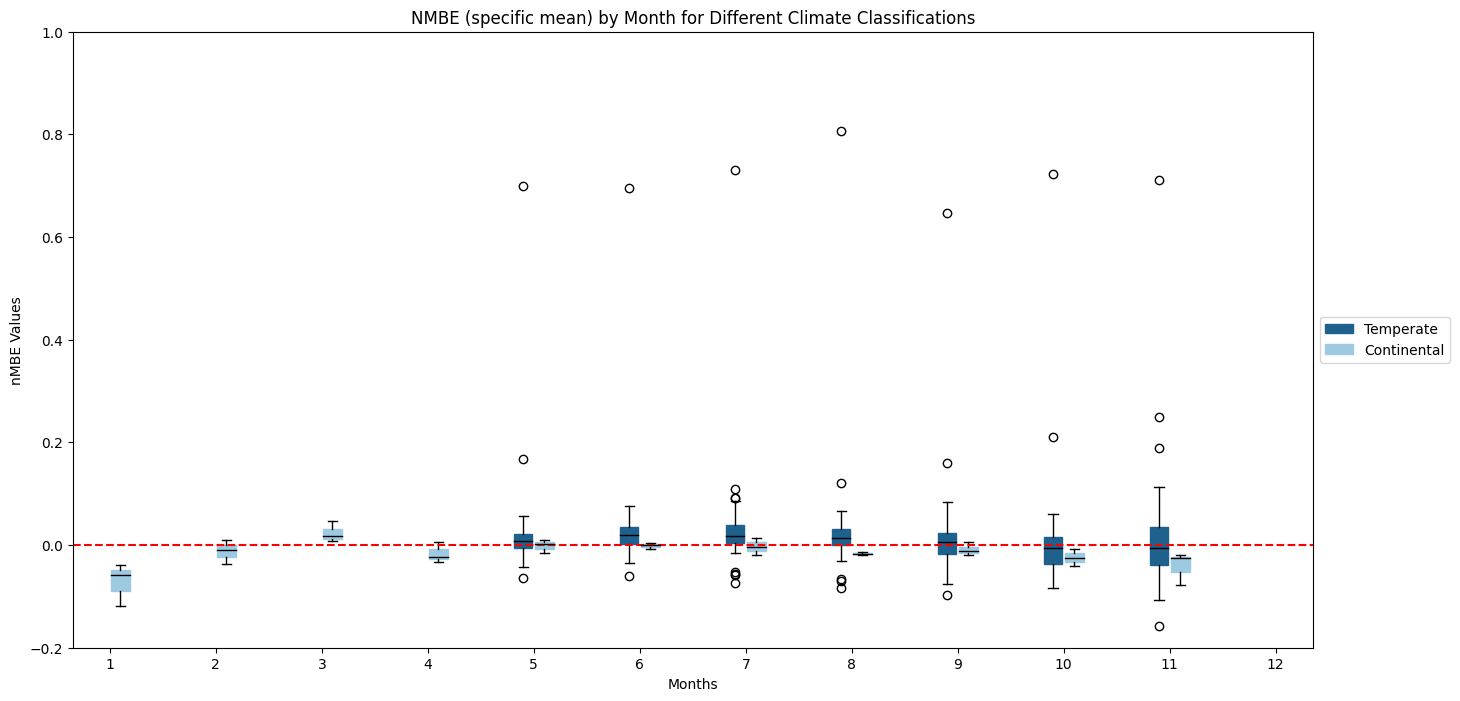

In [207]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot boxplots
bph = plt.boxplot(data_temperate_nmbe, positions=np.array(range(len(data_temperate_nmbe)))*2.0 - 0.2, widths=0.35, patch_artist=True)
bpd = plt.boxplot(data_continental_nmbe, positions=np.array(range(len(data_temperate_nmbe)))*2.0 + 0.2, widths=0.35, patch_artist=True)

plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

# Set box colors
set_box_color(bph, '#1f618d') 
set_box_color(bpd, '#9ecae1') 

ax.set_xticks(range(0, len(ticks) * 2, 2))
ax.set_xticklabels(ticks)
ax.set_xlabel('Months')
ax.set_ylabel('nMBE Values')
ax.set_title('NMBE (specific mean) by Month for Different Climate Classifications')

plt.ylim(-0.2,1)
plt.legend([bph["boxes"][0], bpd["boxes"][0]], climates, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nMBE_spe.png'), dpi=300)

plt.show()

# nMBE by month (mean for each site)

## nMBE

In [157]:
nmbe_totmean_by_month = {}
totmean_month = {}

for column in reference_data_monthly.columns:
    nmbe_totmean_by_month[column] = {}
    totmean_month[column] = np.abs(reference_data_monthly[column].mean())

    for month in range(1,13):
        actual_monthly = reference_data_monthly[reference_data_monthly.index.month == month][column]
        predicted_monthly = model_data_monthly[model_data_monthly.index.month == month][column]

        if not actual_monthly.empty and not predicted_monthly.empty:
            nmbe_value = metric.nmbe(predicted_monthly, actual_monthly, norm = totmean_month[column])
            nmbe_totmean_by_month[column][month] = nmbe_value

In [135]:
nmbe_totmean_by_month

{'camborne': {1: -0.018910701683069152,
  2: -0.024782218732473077,
  3: -0.011272853241535336,
  4: -0.032489044255815516,
  5: -0.013427796933213205,
  6: -0.01292191191615582,
  7: 0.007948834539785121,
  8: -0.013512187779313858,
  9: -0.027912302871006756,
  10: -0.046481964181171634,
  11: -0.009696126544498732,
  12: -0.00917081993670898},
 'carpentras': {1: -0.0035738177844414107,
  2: -0.0016579051662448242,
  3: 0.011593835787448508,
  4: 0.00041359821204099223,
  5: -0.029582434556412508,
  6: 0.007195180824979643,
  7: 0.016948721243975992,
  8: 0.0003860818929062032,
  9: -0.03021906686309844,
  10: -0.03447491726877307,
  11: -0.016292625157341027,
  12: -0.0008513711101395731},
 'budapest_lorinc': {1: 0.023797612608621017,
  2: 0.02396172928255743,
  3: 0.0011715896872636583,
  4: -0.03454370994389094,
  5: -0.024289650370706573,
  6: -0.002481834419913547,
  7: 0.019826765497244683,
  8: -0.003335573028615349,
  9: -0.03259724115523602,
  10: -0.02557501254800307,
  11:

## group

In [136]:
keys_month_tot_c = sites_c.index.intersection(nmbe_totmean_by_month.keys())
keys_month_tot_d = sites_d.index.intersection(nmbe_totmean_by_month.keys())


## average

In [137]:
average_nmbe_c_totmean_by_month = {index: sum(nmbe_totmean_by_month[key][index] for key in keys_month_tot_c) / len(keys_month_tot_c) for index in nmbe_totmean_by_month[next(iter(keys_month_tot_c))].keys()}
average_nmbe_d_totmean_by_month = {index: sum(nmbe_totmean_by_month[key][index] for key in keys_month_tot_d) / len(keys_month_tot_d) for index in nmbe_totmean_by_month[next(iter(keys_month_tot_d))].keys()}


In [138]:
average_nmbe_c_totmean_by_month

{1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: 0.030270160839362466,
 6: 0.04766329822864209,
 7: 0.05369503420232917,
 8: 0.03723041729562326,
 9: 0.014190464747875725,
 10: -0.0014716984242381713,
 11: 0.0008930530985758966,
 12: nan}

In [139]:
average_nmbe_d_totmean_by_month

{1: -0.0025980300800856186,
 2: -0.003721604834600826,
 3: 0.01797922899478746,
 4: -0.02214645824513789,
 5: -0.002225977275500434,
 6: -0.0028502666194713112,
 7: -0.005057621701042979,
 8: -0.024243069632630992,
 9: -0.007417964295301939,
 10: -0.010364528927937098,
 11: -0.003618850013647194,
 12: nan}

## line graph

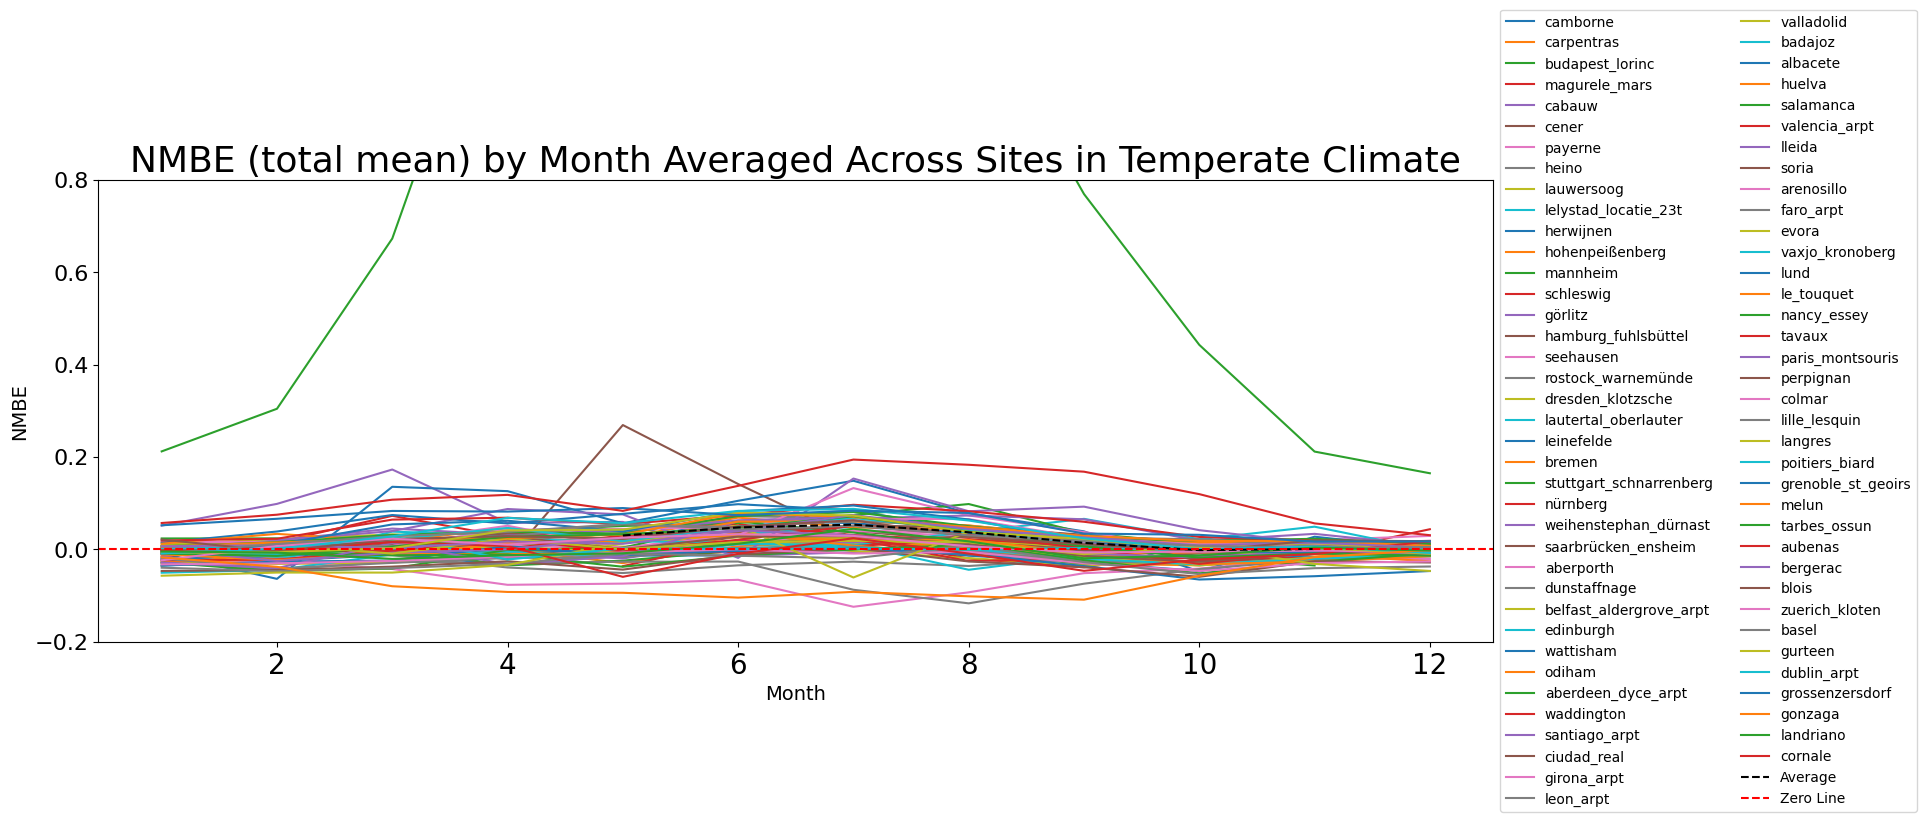

In [168]:
plt.figure(figsize=(18,6))

for key in keys_month_tot_c:
    values = nmbe_totmean_by_month[key]
    
    plt.plot(list(values.keys()), list(values.values()), label=key)


plt.plot(list(average_nmbe_c_totmean_by_month.keys()), list(average_nmbe_c_totmean_by_month.values()), label='Average', linestyle='--', color='black')

plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('NMBE', fontsize = 14)
plt.title('NMBE (total mean) by Month Averaged Across Sites in Temperate Climate', fontsize = 26)

plt.tick_params(axis='x', labelsize = 20)
plt.tick_params(axis='y', labelsize = 16)

plt.ylim(-0.2,0.8)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nMBE_c_tot.png'), dpi=300)

plt.show()

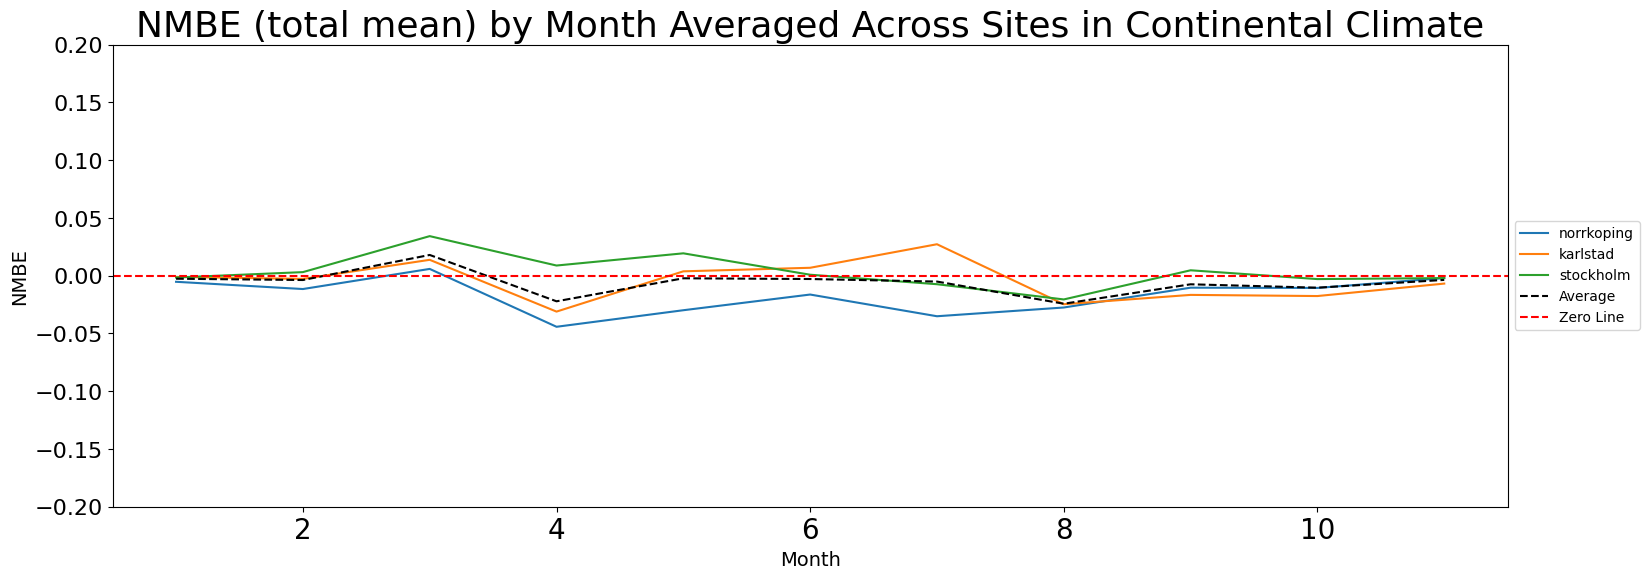

In [169]:
plt.figure(figsize=(18,6))

for key in keys_month_tot_d:
    values = nmbe_totmean_by_month[key]
    
    plt.plot(list(values.keys()), list(values.values()), label=key)


plt.plot(list(average_nmbe_d_totmean_by_month.keys()), list(average_nmbe_d_totmean_by_month.values()), label='Average', linestyle='--', color='black')

plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('NMBE', fontsize = 14)
plt.title('NMBE (total mean) by Month Averaged Across Sites in Continental Climate', fontsize = 26)

plt.tick_params(axis='x', labelsize = 20)
plt.tick_params(axis='y', labelsize = 16)
plt.ylim(-0.2,0.2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nMBE_d_tot.png'), dpi=300)

plt.show()

## box plot

In [203]:
data_temperate_nmbe_totmean = [pd.DataFrame(nmbe_totmean_by_month[key] for key in keys_month_c).loc[:, i] for i in range(1, 13)]
data_continental_nmbe_totmean = [pd.DataFrame(nmbe_totmean_by_month[key] for key in keys_month_d).loc[:, i] for i in range(1, 13)]


In [159]:
data_temperate_nmbe_totmean

[count    73.000000
 mean     -0.003609
 std       0.032929
 min      -0.056862
 25%      -0.018911
 50%      -0.005230
 75%       0.001436
 max       0.212239
 Name: 1, dtype: float64,
 count    73.000000
 mean      0.000212
 std       0.045635
 min      -0.063643
 25%      -0.022244
 50%      -0.003089
 75%       0.010555
 max       0.304524
 Name: 2, dtype: float64,
 count    73.000000
 mean      0.020883
 std       0.086791
 min      -0.079652
 25%      -0.009437
 50%       0.008895
 75%       0.024148
 max       0.672902
 Name: 3, dtype: float64,
 count    73.000000
 mean      0.032426
 std       0.163918
 min      -0.092011
 25%      -0.009633
 50%       0.012429
 75%       0.034834
 max       1.376933
 Name: 4, dtype: float64,
 count    74.000000
 mean      0.030270
 std       0.145588
 min      -0.093766
 25%      -0.009169
 50%       0.012874
 75%       0.035416
 max       1.201544
 Name: 5, dtype: float64,
 count    74.000000
 mean      0.047663
 std       0.151987
 min      

In [105]:
data_continental

[count    3.000000
 mean    -0.071936
 std      0.042024
 min     -0.119116
 25%     -0.088645
 50%     -0.058174
 75%     -0.048346
 max     -0.038519
 Name: 1, dtype: float64,
 count    3.000000
 mean    -0.012092
 std      0.023961
 min     -0.037363
 25%     -0.023288
 50%     -0.009212
 75%      0.000543
 max      0.010299
 Name: 2, dtype: float64,
 count    3.000000
 mean     0.023853
 std      0.020205
 min      0.007673
 25%      0.012529
 50%      0.017386
 75%      0.031942
 max      0.046499
 Name: 3, dtype: float64,
 count    3.000000
 mean    -0.016075
 std      0.020379
 min     -0.032341
 25%     -0.027505
 50%     -0.022670
 75%     -0.007942
 max      0.006785
 Name: 4, dtype: float64,
 count    3.000000
 mean    -0.001208
 std      0.013785
 min     -0.016354
 25%     -0.007113
 50%      0.002128
 75%      0.006366
 max      0.010603
 Name: 5, dtype: float64,
 count    3.000000
 mean    -0.001481
 std      0.006115
 min     -0.008324
 25%     -0.003946
 50%      0.000

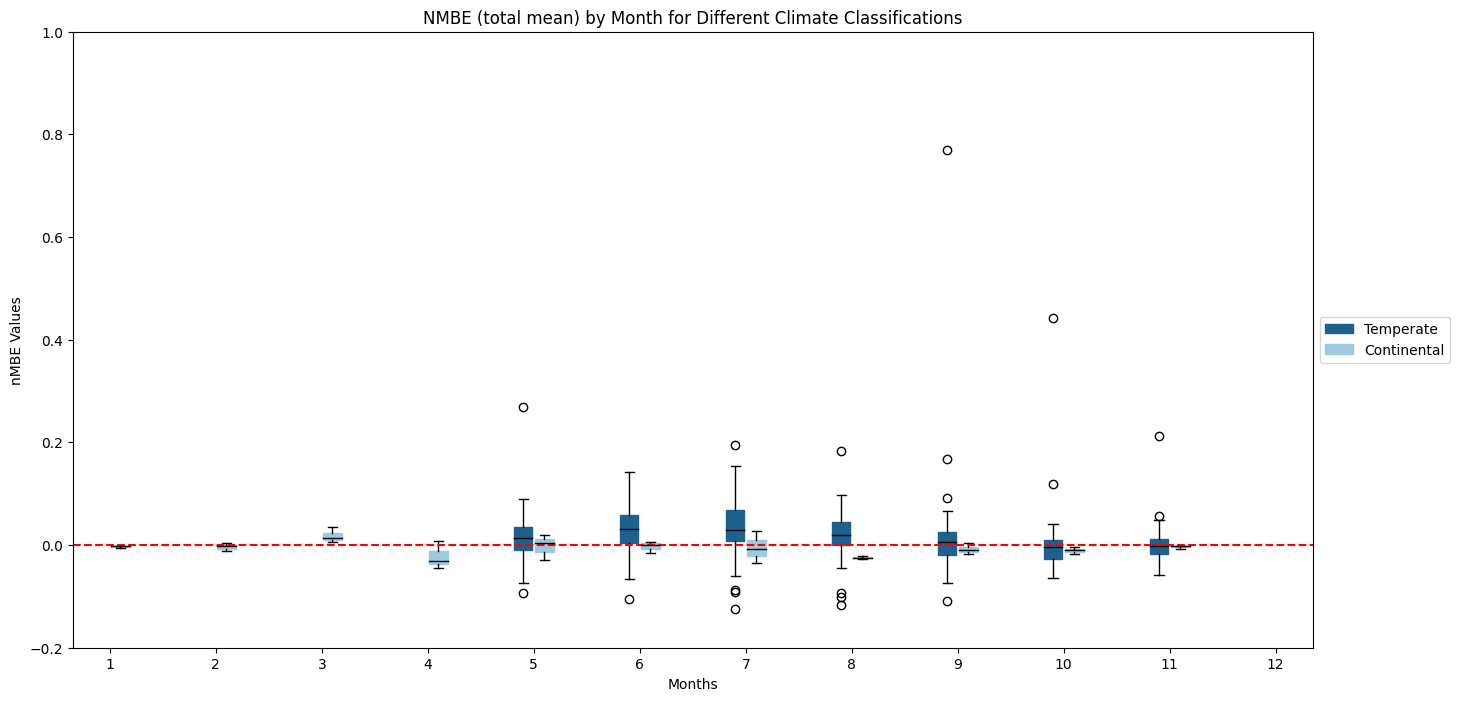

In [208]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot boxplots
bph = plt.boxplot(data_temperate_nmbe_totmean, positions=np.array(range(len(data_continental_nmbe_totmean)))*2.0 - 0.2, widths=0.35, patch_artist=True)
bpd = plt.boxplot(data_continental_nmbe_totmean, positions=np.array(range(len(data_continental_nmbe_totmean)))*2.0 + 0.2, widths=0.35, patch_artist=True)

plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

# Set box colors
set_box_color(bph, '#1f618d') 
set_box_color(bpd, '#9ecae1') 

ax.set_xticks(range(0, len(ticks) * 2, 2))
ax.set_xticklabels(ticks)
ax.set_xlabel('Months')
ax.set_ylabel('nMBE Values')
ax.set_title('NMBE (total mean) by Month for Different Climate Classifications')

plt.ylim(-0.2,1)
plt.legend([bph["boxes"][0], bpd["boxes"][0]], climates, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nMBE_tot.png'), dpi=300)

plt.show()

# nRMSE by month (mean for each site and each hour)

## nRMSE

In [163]:
nrmse_mean_by_month = {}

for column in reference_data_monthly.columns:
    nrmse_mean_by_month[column] = {}
    for month in range(1,13):
        actual_monthly = reference_data_monthly[reference_data_monthly.index.month == month][column]
        predicted_monthly = model_data_monthly[model_data_monthly.index.month == month][column]

        if not actual_monthly.empty and not predicted_monthly.empty:
            nrmse_value = metric.nrmse(predicted_monthly, actual_monthly)
            nrmse_mean_by_month[column][month] = nrmse_value

In [148]:
nrmse_mean_by_month

{'camborne': {1: 0.07253510591955716,
  2: 0.059165919540083975,
  3: 0.020725846700599827,
  4: 0.02595237139835005,
  5: 0.02067780934958608,
  6: 0.023030817954587755,
  7: 0.017755677036287904,
  8: 0.01435457663277399,
  9: 0.032792762933162495,
  10: 0.06874864856314954,
  11: 0.05010605015550027,
  12: 0.06661908072158276},
 'carpentras': {1: 0.02410881554762935,
  2: 0.02121304028396823,
  3: 0.019277347866506093,
  4: 0.008887032607319085,
  5: 0.025673450029847483,
  6: 0.012718469480570921,
  7: 0.014886999360426176,
  8: 0.009326791387591987,
  9: 0.029763000205271437,
  10: 0.05058995639939305,
  11: 0.053023689999417166,
  12: 0.0201219896073154},
 'budapest_lorinc': {1: 0.09912676823689137,
  2: 0.04575889705062895,
  3: 0.0060285124945166114,
  4: 0.03638070998885572,
  5: 0.01723361571405594,
  6: 0.009079923673518344,
  7: 0.014661416187580257,
  8: 0.0095206838251035,
  9: 0.030058438161458305,
  10: 0.0481666495420231,
  11: 0.028317431881760113,
  12: 0.04830827512

## group

In [66]:
keys_month_c = sites_c.index.intersection(nrmse_mean_by_month.keys())
keys_month_d = sites_d.index.intersection(nrmse_mean_by_month.keys())


In [67]:
keys_month_d

Index(['norrkoping', 'karlstad', 'stockholm'], dtype='object', name='station_name')

## average

In [68]:
average_nrmse_c_mean_by_month = {index: sum(nrmse_mean_by_month[key][index] for key in keys_month_c) / len(keys_month_c) for index in nrmse_mean_by_month[next(iter(keys_month_c))].keys()}
average_nrmse_d_mean_by_month = {index: sum(nrmse_mean_by_month[key][index] for key in keys_month_d) / len(keys_month_d) for index in nrmse_mean_by_month[next(iter(keys_month_d))].keys()}


In [69]:
average_nrmse_c_mean_by_month

{1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: 0.04004085546769931,
 6: 0.04034388813479125,
 7: 0.04031083435225308,
 8: 0.04047062532408751,
 9: 0.043438125498693914,
 10: 0.05330174041451578,
 11: 0.07172328183668655,
 12: nan}

In [70]:
average_nrmse_d_mean_by_month

{1: 0.19897177978534797,
 2: 0.06029945690219241,
 3: 0.05974304094254799,
 4: 0.030749339742917367,
 5: 0.018767265005357803,
 6: 0.010853869514000946,
 7: 0.029314641601622126,
 8: 0.026550213149726793,
 9: 0.038325952968154414,
 10: 0.04575986872669167,
 11: 0.09021533867600497,
 12: nan}

## line graph

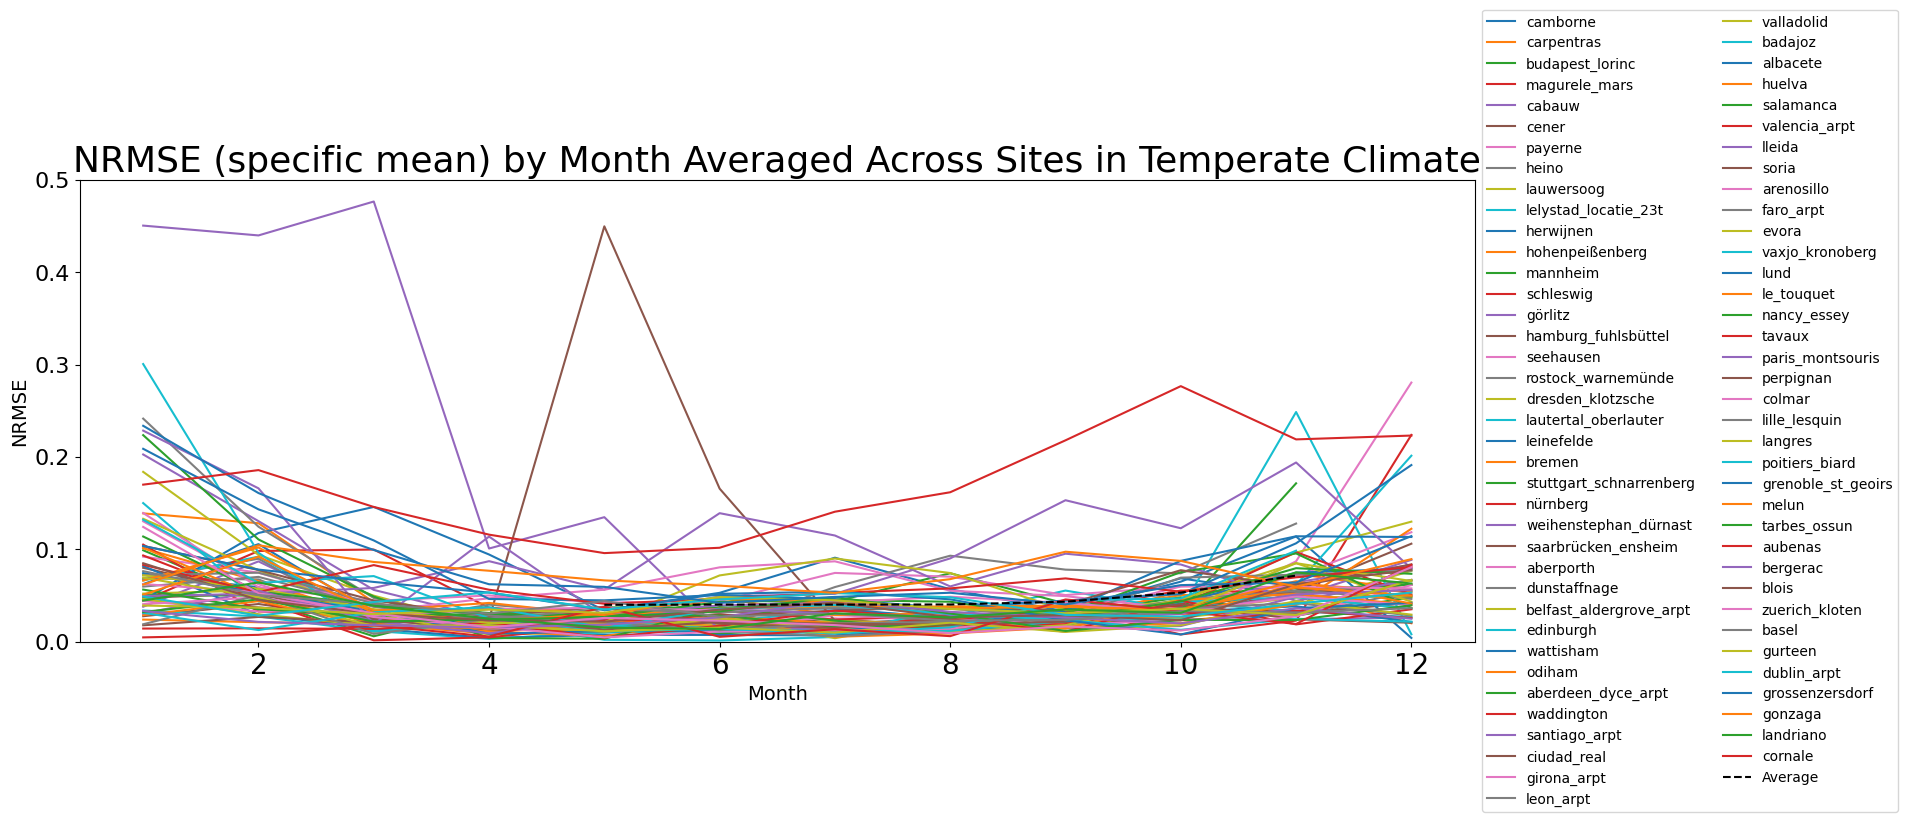

In [163]:
plt.figure(figsize=(18,6))

for key in keys_month_c:
    values = nrmse_mean_by_month[key]
    
    plt.plot(list(values.keys()), list(values.values()), label=key)


plt.plot(list(average_nrmse_c_mean_by_month.keys()), list(average_nrmse_c_mean_by_month.values()), label='Average', linestyle='--', color='black')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('NRMSE', fontsize = 14)
plt.title('NRMSE (specific mean) by Month Averaged Across Sites in Temperate Climate', fontsize = 26)

plt.tick_params(axis='x', labelsize = 20)
plt.tick_params(axis='y', labelsize = 16)
plt.ylim(0,0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nRMSE_c_spe.png'), dpi=300)

plt.show()

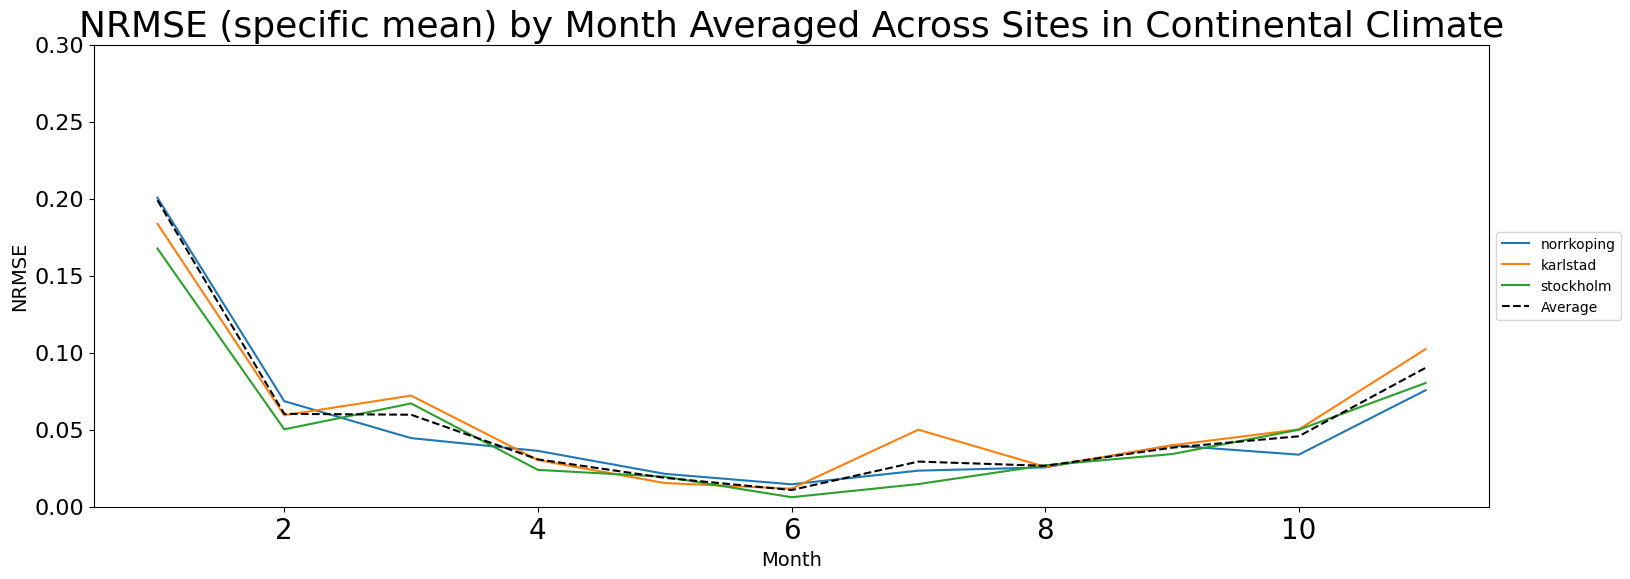

In [164]:
plt.figure(figsize=(18,6))

for key in keys_month_d:
    values = nrmse_mean_by_month[key]
    
    plt.plot(list(values.keys()), list(values.values()), label=key)

plt.plot(list(average_nrmse_d_mean_by_month.keys()), list(average_nrmse_d_mean_by_month.values()), label='Average', linestyle='--', color='black')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('NRMSE', fontsize = 14)
plt.title('NRMSE (specific mean) by Month Averaged Across Sites in Continental Climate', fontsize = 26)

plt.tick_params(axis='x', labelsize = 20)
plt.tick_params(axis='y', labelsize = 16)
plt.ylim(0,0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nRMSE_d_spe.png'), dpi=300)

plt.show()

## box plot

In [209]:
data_temperate_nrmse = [pd.DataFrame(nrmse_mean_by_month[key] for key in keys_month_c).loc[:, i] for i in range(1, 13)]
data_continental_nrmse = [pd.DataFrame(nrmse_mean_by_month[key] for key in keys_month_d).loc[:, i] for i in range(1, 13)]


In [210]:
data_temperate_nrmse

[0     0.072535
 1     0.024109
 2     0.099127
 3          NaN
 4     0.038013
         ...   
 69    0.049075
 70    0.208916
 71    0.061938
 72    0.044675
 73    0.170135
 Name: 1, Length: 74, dtype: float64,
 0     0.059166
 1     0.021213
 2     0.045759
 3          NaN
 4     0.087079
         ...   
 69    0.028287
 70    0.143385
 71    0.104493
 72    0.064296
 73    0.185873
 Name: 2, Length: 74, dtype: float64,
 0     0.020726
 1     0.019277
 2     0.006029
 3          NaN
 4     0.026914
         ...   
 69    0.043085
 70    0.099418
 71    0.086462
 72    0.039062
 73    0.145975
 Name: 3, Length: 74, dtype: float64,
 0     0.025952
 1     0.008887
 2     0.036381
 3          NaN
 4     0.014034
         ...   
 69    0.053509
 70    0.062345
 71    0.076947
 72    0.025017
 73    0.116016
 Name: 4, Length: 74, dtype: float64,
 0     0.020678
 1     0.025673
 2     0.017234
 3     0.025053
 4     0.018482
         ...   
 69    0.034986
 70    0.059507
 71    0.066524


In [105]:
data_continental

[count    3.000000
 mean    -0.071936
 std      0.042024
 min     -0.119116
 25%     -0.088645
 50%     -0.058174
 75%     -0.048346
 max     -0.038519
 Name: 1, dtype: float64,
 count    3.000000
 mean    -0.012092
 std      0.023961
 min     -0.037363
 25%     -0.023288
 50%     -0.009212
 75%      0.000543
 max      0.010299
 Name: 2, dtype: float64,
 count    3.000000
 mean     0.023853
 std      0.020205
 min      0.007673
 25%      0.012529
 50%      0.017386
 75%      0.031942
 max      0.046499
 Name: 3, dtype: float64,
 count    3.000000
 mean    -0.016075
 std      0.020379
 min     -0.032341
 25%     -0.027505
 50%     -0.022670
 75%     -0.007942
 max      0.006785
 Name: 4, dtype: float64,
 count    3.000000
 mean    -0.001208
 std      0.013785
 min     -0.016354
 25%     -0.007113
 50%      0.002128
 75%      0.006366
 max      0.010603
 Name: 5, dtype: float64,
 count    3.000000
 mean    -0.001481
 std      0.006115
 min     -0.008324
 25%     -0.003946
 50%      0.000

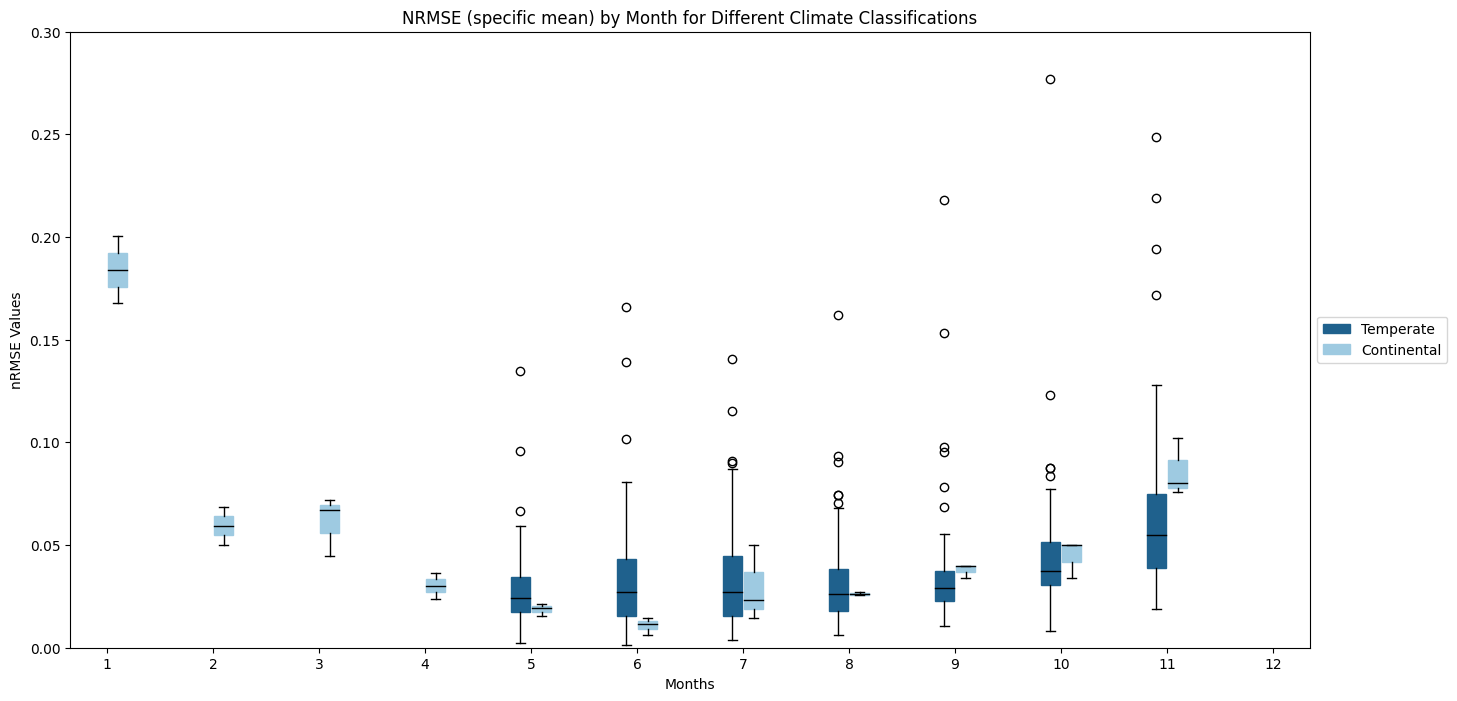

In [218]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot boxplots
bph = plt.boxplot(data_temperate_nrmse, positions=np.array(range(len(data_temperate_nrmse)))*2.0 - 0.2, widths=0.35, patch_artist=True)
bpd = plt.boxplot(data_continental_nrmse, positions=np.array(range(len(data_temperate_nrmse)))*2.0 + 0.2, widths=0.35, patch_artist=True)

# Set box colors
set_box_color(bph, '#1f618d') 
set_box_color(bpd, '#9ecae1') 

ax.set_xticks(range(0, len(ticks) * 2, 2))
ax.set_xticklabels(ticks)
ax.set_xlabel('Months')
ax.set_ylabel('nRMSE Values')
ax.set_title('NRMSE (specific mean) by Month for Different Climate Classifications')

plt.ylim(0,0.3)
plt.legend([bph["boxes"][0], bpd["boxes"][0]], climates, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nRMSE_spe.png'), dpi=300)

plt.show()

# nRMSE by month (mean for each site)

## nRMSE

In [170]:
nrmse_totmean_by_month = {}
totmean_month = {}

for column in reference_data_monthly.columns:
    nrmse_totmean_by_month[column] = {}
    totmean_month[column] = np.abs(reference_data_monthly[column].mean())

    for month in range(1,13):
        actual_monthly = reference_data_monthly[reference_data_monthly.index.month == month][column]
        predicted_monthly = model_data_monthly[model_data_monthly.index.month == month][column]

        if not actual_monthly.empty and not predicted_monthly.empty:
            nrmse_value = metric.nrmse(predicted_monthly, actual_monthly, norm = totmean_month[column])
            nrmse_totmean_by_month[column][month] = nrmse_value

In [150]:
nrmse_totmean_by_month

{'camborne': {1: 0.018944832320955077,
  2: 0.02656727421339067,
  3: 0.01746044073410026,
  4: 0.03865427547358818,
  5: 0.033198036154122576,
  6: 0.039141094354124675,
  7: 0.02904927970530451,
  8: 0.01961340809354402,
  9: 0.033155765893242706,
  10: 0.04741416155382786,
  11: 0.01400064214420829,
  12: 0.011909057076234611},
 'carpentras': {1: 0.009405446169829131,
  2: 0.011578156045127594,
  3: 0.017463504080215405,
  4: 0.010922212194876473,
  5: 0.03770325490324456,
  6: 0.021048932413721032,
  7: 0.025943119128820025,
  8: 0.0135186780345135,
  9: 0.032862936189882806,
  10: 0.03627859240007661,
  11: 0.023816152689694253,
  12: 0.006903015636931182},
 'budapest_lorinc': {1: 0.02739102701828944,
  2: 0.024180659193551442,
  3: 0.005850945590442056,
  4: 0.05057029944860105,
  5: 0.025213672350788502,
  6: 0.015727837327280687,
  7: 0.024989833025223354,
  8: 0.014284232365553196,
  9: 0.033196557002031904,
  10: 0.03264876964671286,
  11: 0.008450601780050549,
  12: 0.011117

## group

In [75]:
keys_month_tot_c = sites_c.index.intersection(nrmse_totmean_by_month.keys())
keys_month_tot_d = sites_d.index.intersection(nrmse_totmean_by_month.keys())


## average

In [76]:
average_nrmse_c_totmean_by_month = {index: sum(nrmse_totmean_by_month[key][index] for key in keys_month_tot_c) / len(keys_month_tot_c) for index in nrmse_totmean_by_month[next(iter(keys_month_tot_c))].keys()}
average_nrmse_d_totmean_by_month = {index: sum(nrmse_totmean_by_month[key][index] for key in keys_month_tot_d) / len(keys_month_tot_d) for index in nrmse_totmean_by_month[next(iter(keys_month_tot_d))].keys()}


In [77]:
average_nrmse_c_totmean_by_month

{1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: 0.07828372217841108,
 6: 0.08291120139680266,
 7: 0.08345751936494043,
 8: 0.07100884509460155,
 9: 0.05433685581834732,
 10: 0.03847789087174594,
 11: 0.025202486610468363,
 12: nan}

In [78]:
average_nrmse_d_totmean_by_month

{1: 0.0060297323505823,
 2: 0.01803921396250002,
 3: 0.04693155968678841,
 4: 0.04073509140996752,
 5: 0.034026757027117556,
 6: 0.02142313528579851,
 7: 0.05542369696015231,
 8: 0.038814504117329875,
 9: 0.03286798957155538,
 10: 0.019151335601897596,
 11: 0.00762842588957334,
 12: nan}

## line graph

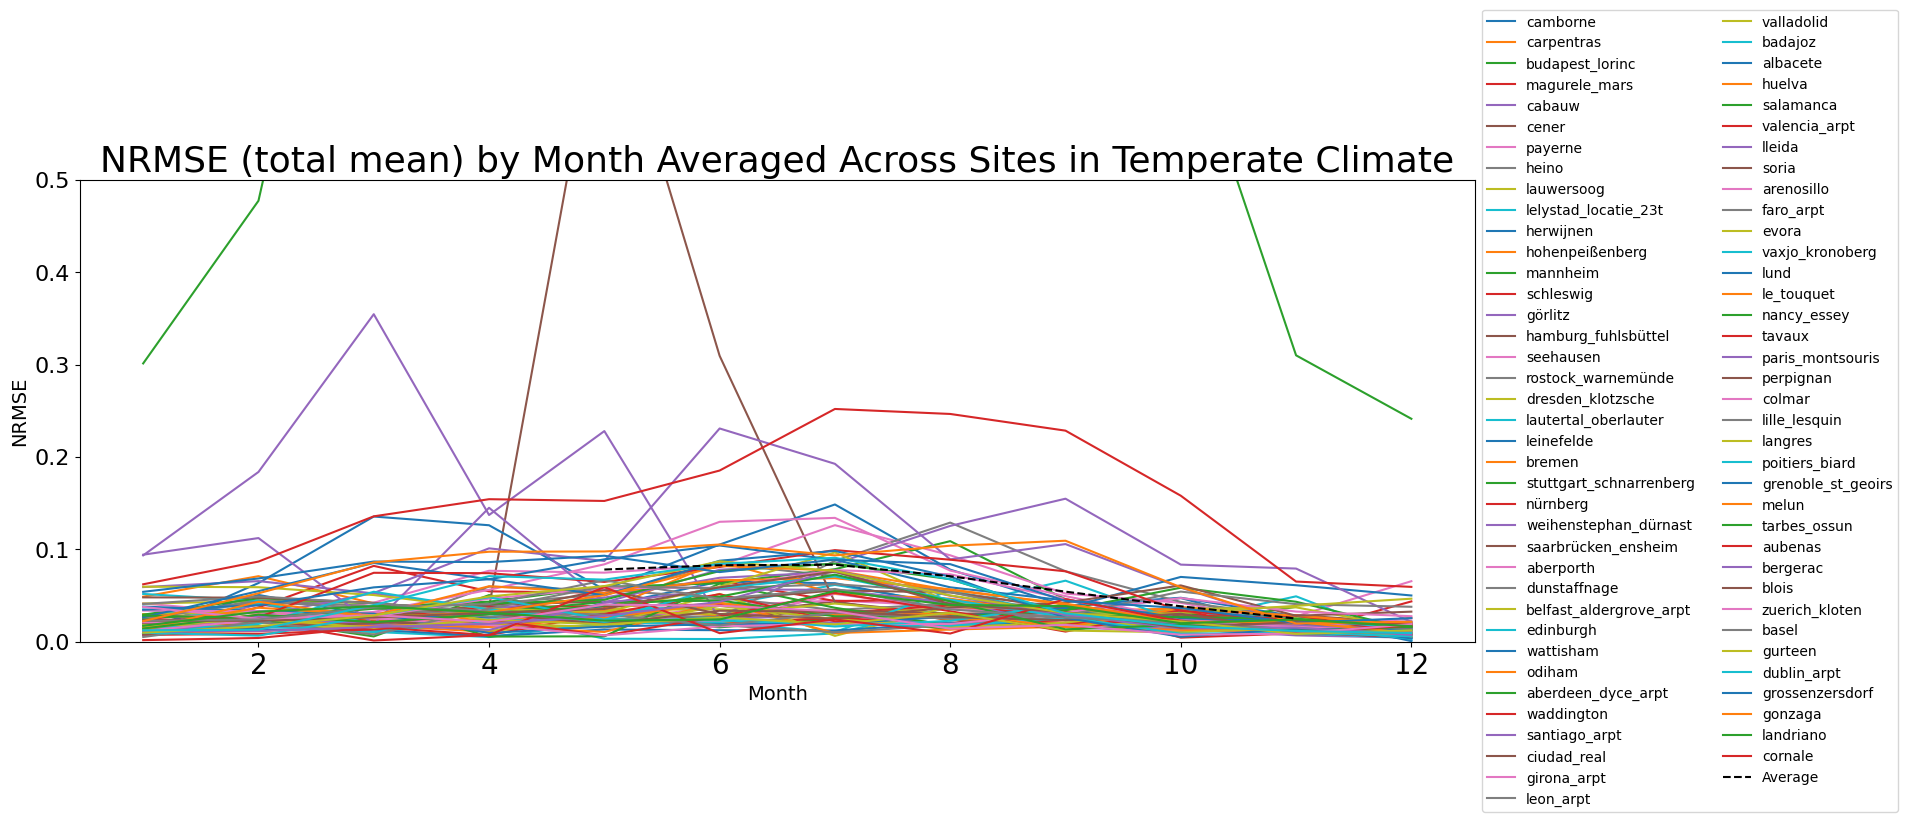

In [165]:
plt.figure(figsize=(18,6))

for key in keys_month_tot_c:
    values = nrmse_totmean_by_month[key]
    
    plt.plot(list(values.keys()), list(values.values()), label=key)


plt.plot(list(average_nrmse_c_totmean_by_month.keys()), list(average_nrmse_c_totmean_by_month.values()), label='Average', linestyle='--', color='black')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('NRMSE', fontsize = 14)
plt.title('NRMSE (total mean) by Month Averaged Across Sites in Temperate Climate', fontsize = 26)

plt.tick_params(axis='x', labelsize = 20)
plt.tick_params(axis='y', labelsize = 16)
plt.ylim(0,0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nRMSE_c_tot.png'), dpi=300)

plt.show()

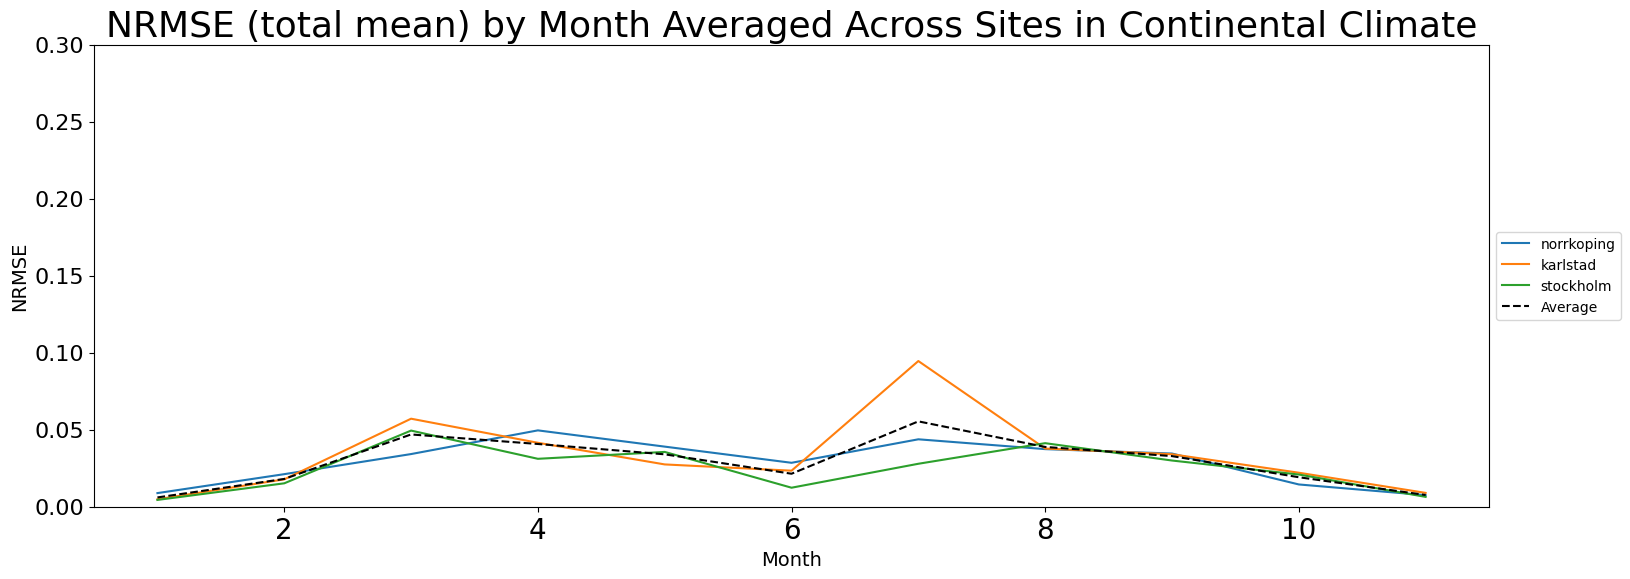

In [170]:
plt.figure(figsize=(18,6))

for key in keys_month_tot_d:
    values = nrmse_totmean_by_month[key]
    
    plt.plot(list(values.keys()), list(values.values()), label=key)


plt.plot(list(average_nrmse_d_totmean_by_month.keys()), list(average_nrmse_d_totmean_by_month.values()), label='Average', linestyle='--', color='black')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('NRMSE', fontsize = 14)
plt.title('NRMSE (total mean) by Month Averaged Across Sites in Continental Climate', fontsize = 26)

plt.tick_params(axis='x', labelsize = 20)
plt.tick_params(axis='y', labelsize = 16)
plt.ylim(0,0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nRMSE_d_tot.png'), dpi=300)

plt.show()

## box plot

In [213]:
data_temperate_nrmse_totmean = [pd.DataFrame(nrmse_totmean_by_month[key] for key in keys_month_c).loc[:, i] for i in range(1, 13)]
data_continental_nrmse_totmean = [pd.DataFrame(nrmse_totmean_by_month[key] for key in keys_month_d).loc[:, i] for i in range(1, 13)]


In [172]:
data_temperate_nrmse_totmean

[count    73.000000
 mean      0.028873
 std       0.037098
 min       0.001856
 25%       0.012503
 50%       0.020340
 75%       0.029946
 max       0.301319
 Name: 1, dtype: float64,
 count    73.000000
 mean      0.041173
 std       0.057758
 min       0.004179
 25%       0.022170
 50%       0.027463
 75%       0.043388
 max       0.477395
 Name: 2, dtype: float64,
 count    73.000000
 mean      0.052408
 std       0.124771
 min       0.001487
 25%       0.018810
 50%       0.028046
 75%       0.041700
 max       1.032556
 Name: 3, dtype: float64,
 count    73.000000
 mean      0.065976
 std       0.215527
 min       0.005205
 25%       0.021640
 50%       0.031924
 75%       0.049126
 max       1.862124
 Name: 4, dtype: float64,
 count    74.000000
 mean      0.078284
 std       0.230648
 min       0.003391
 25%       0.025419
 50%       0.036915
 75%       0.056493
 max       1.896247
 Name: 5, dtype: float64,
 count    74.000000
 mean      0.082911
 std       0.231909
 min      

In [105]:
data_continental

[count    3.000000
 mean    -0.071936
 std      0.042024
 min     -0.119116
 25%     -0.088645
 50%     -0.058174
 75%     -0.048346
 max     -0.038519
 Name: 1, dtype: float64,
 count    3.000000
 mean    -0.012092
 std      0.023961
 min     -0.037363
 25%     -0.023288
 50%     -0.009212
 75%      0.000543
 max      0.010299
 Name: 2, dtype: float64,
 count    3.000000
 mean     0.023853
 std      0.020205
 min      0.007673
 25%      0.012529
 50%      0.017386
 75%      0.031942
 max      0.046499
 Name: 3, dtype: float64,
 count    3.000000
 mean    -0.016075
 std      0.020379
 min     -0.032341
 25%     -0.027505
 50%     -0.022670
 75%     -0.007942
 max      0.006785
 Name: 4, dtype: float64,
 count    3.000000
 mean    -0.001208
 std      0.013785
 min     -0.016354
 25%     -0.007113
 50%      0.002128
 75%      0.006366
 max      0.010603
 Name: 5, dtype: float64,
 count    3.000000
 mean    -0.001481
 std      0.006115
 min     -0.008324
 25%     -0.003946
 50%      0.000

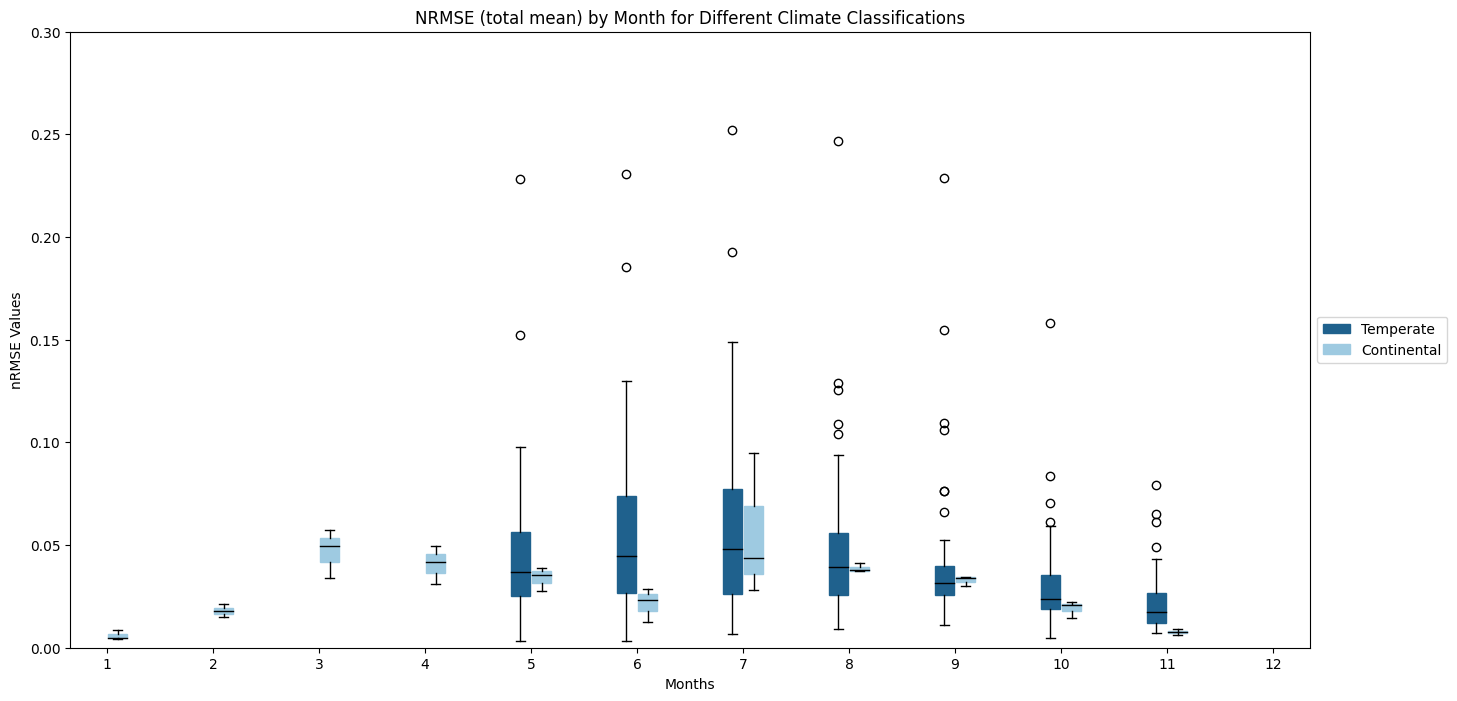

In [217]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot boxplots
bph = plt.boxplot(data_temperate_nrmse_totmean, positions=np.array(range(len(data_temperate_nrmse_totmean)))*2.0 - 0.2, widths=0.35, patch_artist=True)
bpd = plt.boxplot(data_continental_nrmse_totmean, positions=np.array(range(len(data_temperate_nrmse_totmean)))*2.0 + 0.2, widths=0.35, patch_artist=True)

# Set box colors
set_box_color(bph, '#1f618d') 
set_box_color(bpd, '#9ecae1') 

ax.set_xticks(range(0, len(ticks) * 2, 2))
ax.set_xticklabels(ticks)
ax.set_xlabel('Months')
ax.set_ylabel('nRMSE Values')
ax.set_title('NRMSE (total mean) by Month for Different Climate Classifications')

plt.ylim(0,0.3)
plt.legend([bph["boxes"][0], bpd["boxes"][0]], climates, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(plots_path, 'climate_zones/monthly_nRMSE_tot.png'), dpi=300)

plt.show()